In [400]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

#Load in data sets

In [401]:
compas = pd.read_csv('C:/Users/sjaco/OneDrive/Desktop/final project/compas.csv')
two_year = pd.read_csv("C:/Users/sjaco/OneDrive/Desktop/final project/compas-scores-two-years.csv")

examine the data

In [402]:
compas.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [403]:
print(compas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

In [404]:
two_year.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [405]:
print(two_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

##rename 'first', 'last' and 'dob'to match column name in compas dataset for merge

In [406]:
two_year.rename(columns={'first':'FirstName', 'last':'LastName', 'dob':'DateOfBirth'}, inplace=True)

merge the data sets using 'FirstName', 'LastName' and 'DateOfBirth'

In [407]:
print(two_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   FirstName                7214 non-null   object 
 3   LastName                 7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   DateOfBirth              7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [408]:
full_compas = compas.merge(two_year, how='outer')

In [409]:
full_compas.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,id,name,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,7.0,Risk of Violence,-2.08,4.0,Low,New,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,8.0,Risk of Recidivism,-1.06,2.0,Low,New,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,18.0,Risk of Failure to Appear,15.00,1.0,Low,New,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50848.0,57174.0,51956.0,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1.0,Low,7.0,Risk of Violence,-2.84,2.0,Low,New,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50848.0,57174.0,51956.0,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1.0,Low,8.0,Risk of Recidivism,-1.50,1.0,Low,New,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
print(full_compas.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  float64
 1   AssessmentID             60843 non-null  float64
 2   Case_ID                  60843 non-null  float64
 3   Agency_Text              60843 non-null  object 
 4   LastName                 68057 non-null  object 
 5   FirstName                68057 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              68057 non-null  object 
 10  ScaleSet_ID              60843 non-null  float64
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

#break out the objects

In [411]:
cat_compas = full_compas.select_dtypes(include=['object']).copy()

In [412]:
cat_compas.head()

,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,compas_screening_date,sex,age_cat,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_charge_degree,c_charge_desc,r_case_number,r_charge_degree,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,in_custody,out_custody
0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
print(cat_compas.isnull().values.sum())

2037519


In [414]:
print(cat_compas.isnull().sum())

Agency_Text                 7214
LastName                       0
FirstName                      0
MiddleName                 52409
Sex_Code_Text               7214
Ethnic_Code_Text            7214
DateOfBirth                    0
ScaleSet                    7214
AssessmentReason            7214
Language                    7214
LegalStatus                 7214
CustodyStatus               7214
MaritalStatus               7214
Screening_Date              7214
RecSupervisionLevelText     7214
DisplayText                 7214
ScoreText                   7259
AssessmentType              7214
name                       60843
compas_screening_date      60843
sex                        60843
age_cat                    60843
race                       60843
c_jail_in                  61150
c_jail_out                 61150
c_case_number              60865
c_offense_date             62002
c_arrest_date              66920
c_charge_degree            60843
c_charge_desc              60872
r_case_num

#MiddleName is the most incomplete and has enough NULL values that I think it's better just to drop it completely

In [415]:
del cat_compas['MiddleName']

In [416]:
del cat_compas['compas_screening_date']
del cat_compas['sex']
del cat_compas['age_cat']
del cat_compas['race']
del cat_compas['c_jail_in']
del cat_compas['c_jail_out']
del cat_compas['c_offense_date']
del cat_compas['c_arrest_date']
del cat_compas['r_case_number']
del cat_compas['r_charge_degree']
del cat_compas['r_offense_date']
del cat_compas['r_charge_desc']
del cat_compas['r_jail_in']
del cat_compas['r_jail_out']
del cat_compas['vr_case_number']
del cat_compas['vr_charge_degree']
del cat_compas['vr_offense_date']
del cat_compas['vr_charge_desc']
del cat_compas['in_custody']
del cat_compas['out_custody']

In [417]:
print(cat_compas.isnull().sum())

Agency_Text                 7214
LastName                       0
FirstName                      0
Sex_Code_Text               7214
Ethnic_Code_Text            7214
DateOfBirth                    0
ScaleSet                    7214
AssessmentReason            7214
Language                    7214
LegalStatus                 7214
CustodyStatus               7214
MaritalStatus               7214
Screening_Date              7214
RecSupervisionLevelText     7214
DisplayText                 7214
ScoreText                   7259
AssessmentType              7214
name                       60843
c_case_number              60865
c_charge_degree            60843
c_charge_desc              60872
type_of_assessment         60843
score_text                 60843
screening_date             60843
v_type_of_assessment       60843
v_score_text               60843
v_screening_date           60843
dtype: int64


In [418]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Agency_Text              60843 non-null  object
 1   LastName                 68057 non-null  object
 2   FirstName                68057 non-null  object
 3   Sex_Code_Text            60843 non-null  object
 4   Ethnic_Code_Text         60843 non-null  object
 5   DateOfBirth              68057 non-null  object
 6   ScaleSet                 60843 non-null  object
 7   AssessmentReason         60843 non-null  object
 8   Language                 60843 non-null  object
 9   LegalStatus              60843 non-null  object
 10  CustodyStatus            60843 non-null  object
 11  MaritalStatus            60843 non-null  object
 12  Screening_Date           60843 non-null  object
 13  RecSupervisionLevelText  60843 non-null  object
 14  DisplayText              60843 non-nul

In [419]:
print(cat_compas.isnull().sum())

Agency_Text                 7214
LastName                       0
FirstName                      0
Sex_Code_Text               7214
Ethnic_Code_Text            7214
DateOfBirth                    0
ScaleSet                    7214
AssessmentReason            7214
Language                    7214
LegalStatus                 7214
CustodyStatus               7214
MaritalStatus               7214
Screening_Date              7214
RecSupervisionLevelText     7214
DisplayText                 7214
ScoreText                   7259
AssessmentType              7214
name                       60843
c_case_number              60865
c_charge_degree            60843
c_charge_desc              60872
type_of_assessment         60843
score_text                 60843
screening_date             60843
v_type_of_assessment       60843
v_score_text               60843
v_screening_date           60843
dtype: int64


In [420]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Now we fill the rest of the empty cells

In [421]:
cat_compas = cat_compas.fillna(cat_compas['Agency_Text'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['Sex_Code_Text'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['Ethnic_Code_Text'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['AssessmentReason'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['Language'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['CustodyStatus'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['MaritalStatus'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['Screening_Date'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['ScoreText'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['AssessmentType'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['name'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_case_number'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_charge_degree'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['c_charge_desc'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['type_of_assessment'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['score_text'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['screening_date'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['v_type_of_assessment'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['v_score_text'].value_counts().index[0])
cat_compas = cat_compas.fillna(cat_compas['v_screening_date'].value_counts().index[0])

In [422]:
print(cat_compas.isnull().values.sum())

0


#no NULL values left so now we can move on 

In [423]:
print(cat_compas.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Agency_Text              68057 non-null  object
 1   LastName                 68057 non-null  object
 2   FirstName                68057 non-null  object
 3   Sex_Code_Text            68057 non-null  object
 4   Ethnic_Code_Text         68057 non-null  object
 5   DateOfBirth              68057 non-null  object
 6   ScaleSet                 68057 non-null  object
 7   AssessmentReason         68057 non-null  object
 8   Language                 68057 non-null  object
 9   LegalStatus              68057 non-null  object
 10  CustodyStatus            68057 non-null  object
 11  MaritalStatus            68057 non-null  object
 12  Screening_Date           68057 non-null  object
 13  RecSupervisionLevelText  68057 non-null  object
 14  DisplayText              68057 non-nul

#now to look at the variables

In [424]:
print(cat_compas['Ethnic_Code_Text'].value_counts())

African-American    27018
Caucasian           21783
Hispanic             8742
PRETRIAL             7214
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


#combine "African-American" and "African-Am", also "Asian" and "Oriental" -problematic yeesh

In [425]:
def race (series): 
    if series == "African-American":
        return 0
    if series == "Caucasian": 
        return 1
    if series == "Hispanic":
        return 2
    if series == "Other":
        return 3
    if series == "Asian":
        return 4
    if series == "Native American":
        return 5
    if series == "Arabic":
        return 6
    if series == "African-Am":
        return 0
    if series == "Oriental":
        return 4
    
cat_compas['Ethnic_Code_TextR'] = cat_compas['Ethnic_Code_Text'].apply(race)

In [426]:
print(cat_compas['Ethnic_Code_TextR'].value_counts())

0.0    27069
1.0    21783
2.0     8742
3.0     2592
4.0      363
5.0      219
6.0       75
Name: Ethnic_Code_TextR, dtype: int64


In [427]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR
0,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Violence,Low,New,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0
1,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0
2,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/5/1992,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,Low,Risk of Failure to Appear,Low,New,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0
3,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Violence,Low,New,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0
4,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,9/16/1984,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,Low,Risk of Recidivism,Low,New,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0


#get set up to start some analysis

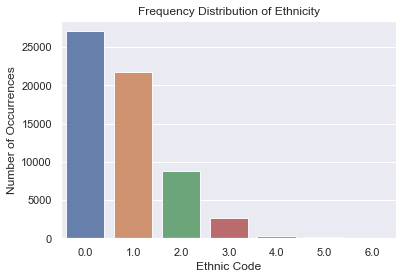

In [428]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ethnicity_count = cat_compas['Ethnic_Code_TextR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ethnicity_count.index, ethnicity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnic Code', fontsize=12)
plt.show()

##If nothing else we can see that African Americans are arrested far more frequently than the other races classified in this dataset.

#recode the rest of the columns

In [429]:
print(cat_compas['Language'].value_counts())

English     60591
PRETRIAL     7214
Spanish       252
Name: Language, dtype: int64


In [430]:
def language (series): 
    if series == "English":
        return 0
    if series == "Spanish": 
        return 1
cat_compas['LanguageR'] = cat_compas['Language'].apply(language)

In [431]:
print(cat_compas['LegalStatus'].value_counts())

Pretrial               37578
Post Sentence          18333
PRETRIAL                7214
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64


In [432]:
def status (series): 
    if series == "Pretrial":
        return 0
    if series == "Post Sentence": 
        return 1
    if series == "Other":
        return 2
    if series == "Conditional Release":
        return 3
    if series == "Probation Violator":
        return 4
    if series == "Parole Violator":
        return 5
    if series == "Deferred Sentencing":
        return 6
cat_compas['LegalStatusR'] = cat_compas['LegalStatus'].apply(status)

In [433]:
print(cat_compas['CustodyStatus'].value_counts())

Jail Inmate            30129
Probation              22968
Pretrial Defendant      7644
PRETRIAL                7214
Residential Program       66
Parole                    21
Prison Inmate             15
Name: CustodyStatus, dtype: int64


In [434]:
def cust (series): 
    if series == "Jail Inmate":
        return 0
    if series == "Probation": 
        return 1
    if series == "Pretrial Defendant":
        return 2
    if series == "Residential Program":
        return 3
    if series == "Parole":
        return 4
    if series == "Prison Inmate":
        return 5
cat_compas['CustodyStatusR'] = cat_compas['CustodyStatus'].apply(cust)

In [435]:
print(cat_compas['MaritalStatus'].value_counts())

Single               45126
Married               8172
PRETRIAL              7214
Divorced              3879
Separated             1803
Significant Other     1260
Widowed                390
Unknown                213
Name: MaritalStatus, dtype: int64


In [436]:
def love (series): 
    if series == "Single":
        return 0
    if series == "Married": 
        return 1
    if series == "Divorced":
        return 2
    if series == "Separated":
        return 3
    if series == "Significant Other":
        return 4
    if series == "Widowed":
        return 5
    if series == "Unknown":
        return 6
cat_compas['MaritalStatusR'] = cat_compas['MaritalStatus'].apply(love)

In [437]:
print(cat_compas['RecSupervisionLevelText'].value_counts())

Low                                   38472
Medium                                10476
Medium with Override Consideration     7827
PRETRIAL                               7214
High                                   4068
Name: RecSupervisionLevelText, dtype: int64


In [438]:
def rslt (series): 
    if series == "Low":
        return 0
    if series == "Medium": 
        return 1
    if series == "Medium with Override Consideration":
        return 2
    if series == "PRETRIAL":
        return 3
    if series == "High":
        return 4
cat_compas['RecSupervisionLevelText'] = cat_compas['RecSupervisionLevelText'].apply(rslt)

In [439]:
print(cat_compas['Agency_Text'].value_counts())

PRETRIAL          48314
Probation         19056
DRRD                564
Broward County      123
Name: Agency_Text, dtype: int64


In [440]:
def aget (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Probation": 
        return 1
    if series == "DRRD":
        return 2
    if series == "Broward County":
        return 3
cat_compas['Agency_Text'] = cat_compas['Agency_Text'].apply(aget)

In [441]:
print(cat_compas['Sex_Code_Text'].value_counts())

Male        47514
Female      13329
PRETRIAL     7214
Name: Sex_Code_Text, dtype: int64


In [442]:
def sex (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Male": 
        return 1
    if series == "Female":
        return 2
cat_compas['Sex_Code_Text'] = cat_compas['Sex_Code_Text'].apply(sex)

In [443]:
print(cat_compas['ScaleSet'].value_counts())

Risk and Prescreen    58647
PRETRIAL               7214
All Scales             2196
Name: ScaleSet, dtype: int64


In [444]:
def sca (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Risk and Prescreen": 
        return 1
    if series == "All Scales":
        return 2
cat_compas['ScaleSet'] = cat_compas['ScaleSet'].apply(sca)

In [445]:
print(cat_compas['AssessmentReason'].value_counts())

Intake      60843
PRETRIAL     7214
Name: AssessmentReason, dtype: int64


In [446]:
def asre (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Intake": 
        return 1
cat_compas['AssessmentReason'] = cat_compas['AssessmentReason'].apply(asre)

In [447]:
print(cat_compas['LegalStatus'].value_counts())

Pretrial               37578
Post Sentence          18333
PRETRIAL                7214
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64


In [448]:
def legal (series): 
    if series == "Pretrial":
        return 0
    if series == "Post Sentence": 
        return 1
    if series == "PRETRIAL":
        return 0
    if series == "Other":
        return 2
    if series == "Conditional Release":
        return 3
    if series == "Probation Violator":
        return 4
    if series == "Parole Violator":
        return 5
    if series == "Deferred Sentencing":
        return 6
cat_compas['LegalStatus'] = cat_compas['LegalStatus'].apply(legal)

In [449]:
print(cat_compas['CustodyStatus'].value_counts())

Jail Inmate            30129
Probation              22968
Pretrial Defendant      7644
PRETRIAL                7214
Residential Program       66
Parole                    21
Prison Inmate             15
Name: CustodyStatus, dtype: int64


In [450]:
def cust (series): 
    if series == "Jail Inmate":
        return 0
    if series == "Probation": 
        return 1
    if series == "PRETRIAL":
        return 2
    if series == "PretrialDefendant":
        return 2
    if series == "Residential Program":
        return 4
    if series == "Parole":
        return 5
    if series == "PrisonInmate":
        return 6
cat_compas['CustodyStatus'] = cat_compas['CustodyStatus'].apply(cust)

In [451]:
print(cat_compas['MaritalStatus'].value_counts())

Single               45126
Married               8172
PRETRIAL              7214
Divorced              3879
Separated             1803
Significant Other     1260
Widowed                390
Unknown                213
Name: MaritalStatus, dtype: int64


In [452]:
def mar (series): 
    if series == "Single":
        return 0
    if series == "Married": 
        return 1
    if series == "PRETRIAL":
        return 2
    if series == "Divorced":
        return 2
    if series == "Significant Other":
        return 4
    if series == "Widowed":
        return 5
    if series == "Unknown":
        return 6
cat_compas['MaritalStatus'] = cat_compas['MaritalStatus'].apply(cust)

In [453]:
print(cat_compas['DisplayText'].value_counts())

Risk of Failure to Appear    20281
Risk of Violence             20281
Risk of Recidivism           20281
PRETRIAL                      7214
Name: DisplayText, dtype: int64


In [454]:
def disp (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Risk of Failure to Appear": 
        return 1
    if series == "Risk of Violence":
        return 2
    if series == "Risk of Recidivism":
        return 3
cat_compas['DisplayText'] = cat_compas['DisplayText'].apply(disp)

In [455]:
print(cat_compas['ScoreText'].value_counts())

Low         41487
Medium      12488
PRETRIAL     7259
High         6823
Name: ScoreText, dtype: int64


In [456]:
def score (series): 
    if series == "PRETRIAL":
        return 0
    if series == "Low": 
        return 1
    if series == "Medium":
        return 2
    if series == "High":
        return 3
cat_compas['ScoreText'] = cat_compas['ScoreText'].apply(score)

In [457]:
print(cat_compas['AssessmentType'].value_counts())

New         56139
PRETRIAL     7214
Copy         4704
Name: AssessmentType, dtype: int64


In [458]:
def asty (series): 
    if series == "PRETRIAL":
        return 0
    if series == "New": 
        return 1
    if series == "Copy":
        return 2
cat_compas['AssessmentType'] = cat_compas['AssessmentType'].apply(asty)

In [459]:
print(cat_compas.dtypes)

Agency_Text                  int64
LastName                    object
FirstName                   object
Sex_Code_Text                int64
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet                     int64
AssessmentReason             int64
Language                    object
LegalStatus                  int64
CustodyStatus              float64
MaritalStatus              float64
Screening_Date              object
RecSupervisionLevelText      int64
DisplayText                  int64
ScoreText                    int64
AssessmentType               int64
name                        object
c_case_number               object
c_charge_degree             object
c_charge_desc               object
type_of_assessment          object
score_text                  object
screening_date              object
v_type_of_assessment        object
v_score_text                object
v_screening_date            object
Ethnic_Code_TextR          float64
LanguageR           

#convert objects to category

In [460]:
cat_compas.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,0,Fisher,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,2,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
1,0,Fisher,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,3,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
2,0,Fisher,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,1,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
3,0,KENDALL,KEVIN,1,Caucasian,9/16/1984,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,2,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,1.0
4,0,KENDALL,KEVIN,1,Caucasian,9/16/1984,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,3,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,1.0


In [461]:
cat_compas_sklearn = cat_compas.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_compas_sklearn['LastName'] = lb_make.fit_transform(cat_compas['LastName'])

cat_compas_sklearn.head() #Results in appending a new column to df

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,0,3005,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,2,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
1,0,3005,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,3,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
2,0,3005,Kevin,1,Caucasian,12/5/1992,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,1,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,0.0
3,0,4426,KEVIN,1,Caucasian,9/16/1984,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,2,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,1.0
4,0,4426,KEVIN,1,Caucasian,9/16/1984,1,1,English,0,0.0,NaN,1/1/2013 0:00,0,3,1,1,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,PRETRIAL,1.0,0.0,0.0,0.0,1.0


#quick encoding for the remaining categories

In [462]:
cat_compas_sklearn['FirstName'] = lb_make.fit_transform(cat_compas['FirstName'])
cat_compas_sklearn['Ethnic_Code_Text'] = lb_make.fit_transform(cat_compas['Ethnic_Code_Text'])
cat_compas_sklearn['Language'] = lb_make.fit_transform(cat_compas['Language'])
cat_compas_sklearn['Screening_Date'] = lb_make.fit_transform(cat_compas['Screening_Date'])
cat_compas_sklearn['name'] = lb_make.fit_transform(cat_compas['name'])
cat_compas_sklearn['c_case_number'] = lb_make.fit_transform(cat_compas['c_case_number'])
cat_compas_sklearn['c_charge_degree'] = lb_make.fit_transform(cat_compas['c_charge_degree'])
cat_compas_sklearn['c_charge_desc'] = lb_make.fit_transform(cat_compas['c_charge_desc'])
cat_compas_sklearn['type_of_assessment'] = lb_make.fit_transform(cat_compas['type_of_assessment'])
cat_compas_sklearn['score_text'] = lb_make.fit_transform(cat_compas['score_text'])
cat_compas_sklearn['screening_date'] = lb_make.fit_transform(cat_compas['name'])
cat_compas_sklearn['v_type_of_assessment'] = lb_make.fit_transform(cat_compas['screening_date'])
cat_compas_sklearn['v_score_text'] = lb_make.fit_transform(cat_compas['v_type_of_assessment'])
cat_compas_sklearn['v_screening_date'] = lb_make.fit_transform(cat_compas['v_screening_date'])

In [463]:
print(cat_compas_sklearn.dtypes)

Agency_Text                  int64
LastName                     int32
FirstName                    int32
Sex_Code_Text                int64
Ethnic_Code_Text             int32
DateOfBirth                 object
ScaleSet                     int64
AssessmentReason             int64
Language                     int32
LegalStatus                  int64
CustodyStatus              float64
MaritalStatus              float64
Screening_Date               int32
RecSupervisionLevelText      int64
DisplayText                  int64
ScoreText                    int64
AssessmentType               int64
name                         int32
c_case_number                int32
c_charge_degree              int32
c_charge_desc                int32
type_of_assessment           int32
score_text                   int32
screening_date               int32
v_type_of_assessment         int32
v_score_text                 int32
v_screening_date             int32
Ethnic_Code_TextR          float64
LanguageR           

In [464]:
cat_compas_sklearn["DateOfBirth"] = pd.to_datetime(cat_compas_sklearn['DateOfBirth'])

In [465]:
print(cat_compas_sklearn.dtypes)

Agency_Text                         int64
LastName                            int32
FirstName                           int32
Sex_Code_Text                       int64
Ethnic_Code_Text                    int32
DateOfBirth                datetime64[ns]
ScaleSet                            int64
AssessmentReason                    int64
Language                            int32
LegalStatus                         int64
CustodyStatus                     float64
MaritalStatus                     float64
Screening_Date                      int32
RecSupervisionLevelText             int64
DisplayText                         int64
ScoreText                           int64
AssessmentType                      int64
name                                int32
c_case_number                       int32
c_charge_degree                     int32
c_charge_desc                       int32
type_of_assessment                  int32
score_text                          int32
screening_date                    

In [466]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from datetime import datetime
from datetime import date

In [467]:
cat_compas_sklearn.shape

(68057, 32)

In [468]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,NaN,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
1,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,NaN,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
2,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,NaN,0,0,1,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
3,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,NaN,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0
4,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,NaN,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0


In [469]:
print(cat_compas_sklearn['MaritalStatus'].value_counts())

2.0    7214
Name: MaritalStatus, dtype: int64


In [470]:
del cat_compas_sklearn['MaritalStatus']

In [471]:
cat_compas_sklearn.head()

,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
1,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
2,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,1,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
3,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0
4,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0


Merge compas dataset with cat_compas_sklearn

In [472]:
compas_concat = pd.concat([compas, cat_compas_sklearn], axis=1)

In [473]:
compas_concat.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType,name,c_case_number,c_charge_degree,c_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,Ethnic_Code_TextR,LanguageR,LegalStatusR,CustodyStatusR,MaritalStatusR
0,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,7.0,Risk of Violence,-2.08,4.0,Low,New,1.0,0.0,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
1,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,8.0,Risk of Recidivism,-1.06,2.0,Low,New,1.0,0.0,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
2,50844.0,57167.0,51950.0,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/2013 0:00,1.0,Low,18.0,Risk of Failure to Appear,15.00,1.0,Low,New,1.0,0.0,0,3005,3197,1,4,1992-12-05,1,1,0,0,0.0,0,0,1,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,0.0
3,50848.0,57174.0,51956.0,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1.0,Low,7.0,Risk of Violence,-2.84,2.0,Low,New,1.0,0.0,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,0,0,2,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0
4,50848.0,57174.0,51956.0,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,22.0,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/2013 0:00,1.0,Low,8.0,Risk of Recidivism,-1.50,1.0,Low,New,1.0,0.0,0,4426,3017,1,4,1984-09-16,1,1,0,0,0.0,0,0,3,1,1,0,7192,2,247,0,3,0,690,0,690,1.0,0.0,0.0,0.0,1.0


In [474]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Person_ID                60843 non-null  float64       
 1   AssessmentID             60843 non-null  float64       
 2   Case_ID                  60843 non-null  float64       
 3   Agency_Text              60843 non-null  object        
 4   LastName                 60843 non-null  object        
 5   FirstName                60843 non-null  object        
 6   MiddleName               15648 non-null  object        
 7   Sex_Code_Text            60843 non-null  object        
 8   Ethnic_Code_Text         60843 non-null  object        
 9   DateOfBirth              60843 non-null  object        
 10  ScaleSet_ID              60843 non-null  float64       
 11  ScaleSet                 60843 non-null  object        
 12  AssessmentReason         60843 n

get rid of duplicate columns

In [475]:
del compas_concat['LastName']
del compas_concat['FirstName']
del compas_concat['Language']
del compas_concat['Ethnic_Code_Text']
del compas_concat['Sex_Code_Text']
del compas_concat['Agency_Text']
del compas_concat['ScaleSet']
del compas_concat['AssessmentReason']
del compas_concat['CustodyStatus']
del compas_concat['MaritalStatus']
del compas_concat['Screening_Date']
del compas_concat['RecSupervisionLevelText']
del compas_concat['DisplayText']
del compas_concat['ScoreText']
del compas_concat['AssessmentType']
del compas_concat['LegalStatus']

In [476]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Person_ID             60843 non-null  float64       
 1   AssessmentID          60843 non-null  float64       
 2   Case_ID               60843 non-null  float64       
 3   MiddleName            15648 non-null  object        
 4   DateOfBirth           60843 non-null  object        
 5   ScaleSet_ID           60843 non-null  float64       
 6   RecSupervisionLevel   60843 non-null  float64       
 7   Scale_ID              60843 non-null  float64       
 8   RawScore              60843 non-null  float64       
 9   DecileScore           60843 non-null  float64       
 10  IsCompleted           60843 non-null  float64       
 11  IsDeleted             60843 non-null  float64       
 12  DateOfBirth           68057 non-null  datetime64[ns]
 13  name            

In [477]:
compas_concat = compas_concat.loc[:,~compas_concat.columns.duplicated()]

In [478]:
compas_concat["DateOfBirth"] = pd.to_datetime(compas_concat['DateOfBirth'])

In [479]:
print(compas_concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68057 entries, 0 to 68056
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Person_ID             60843 non-null  float64       
 1   AssessmentID          60843 non-null  float64       
 2   Case_ID               60843 non-null  float64       
 3   MiddleName            15648 non-null  object        
 4   DateOfBirth           60843 non-null  datetime64[ns]
 5   ScaleSet_ID           60843 non-null  float64       
 6   RecSupervisionLevel   60843 non-null  float64       
 7   Scale_ID              60843 non-null  float64       
 8   RawScore              60843 non-null  float64       
 9   DecileScore           60843 non-null  float64       
 10  IsCompleted           60843 non-null  float64       
 11  IsDeleted             60843 non-null  float64       
 12  name                  68057 non-null  int32         
 13  c_case_number   

In [482]:
del compas_concat[MiddleName]

NameError: name 'MiddleName' is not defined

## ALL DATA CONVERSIONS NEED TO BE DONE PRIOR TO THIS POINT

In [481]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

x=compas_concat[['Person_ID', 'AssessmentID', 'Case_ID', 'DateOfBirth',
                 'ScaleSet_ID','RecSupervisionLevel', 'Scale_ID', 
                 'RawScore', 'IsCompleted','IsDeleted', 'Ethnic_Code_TextR',
                 'LanguageR','LegalStatusR', 'CustodyStatusR', 'MaritalStatusR']]  # Features
y=compas_concat['DecileScore']  # Labels

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# 70% training and 30% test

In [483]:
print(x_train.shape, x_test.shape)

(47639, 15) (20418, 15)


In [484]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [485]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

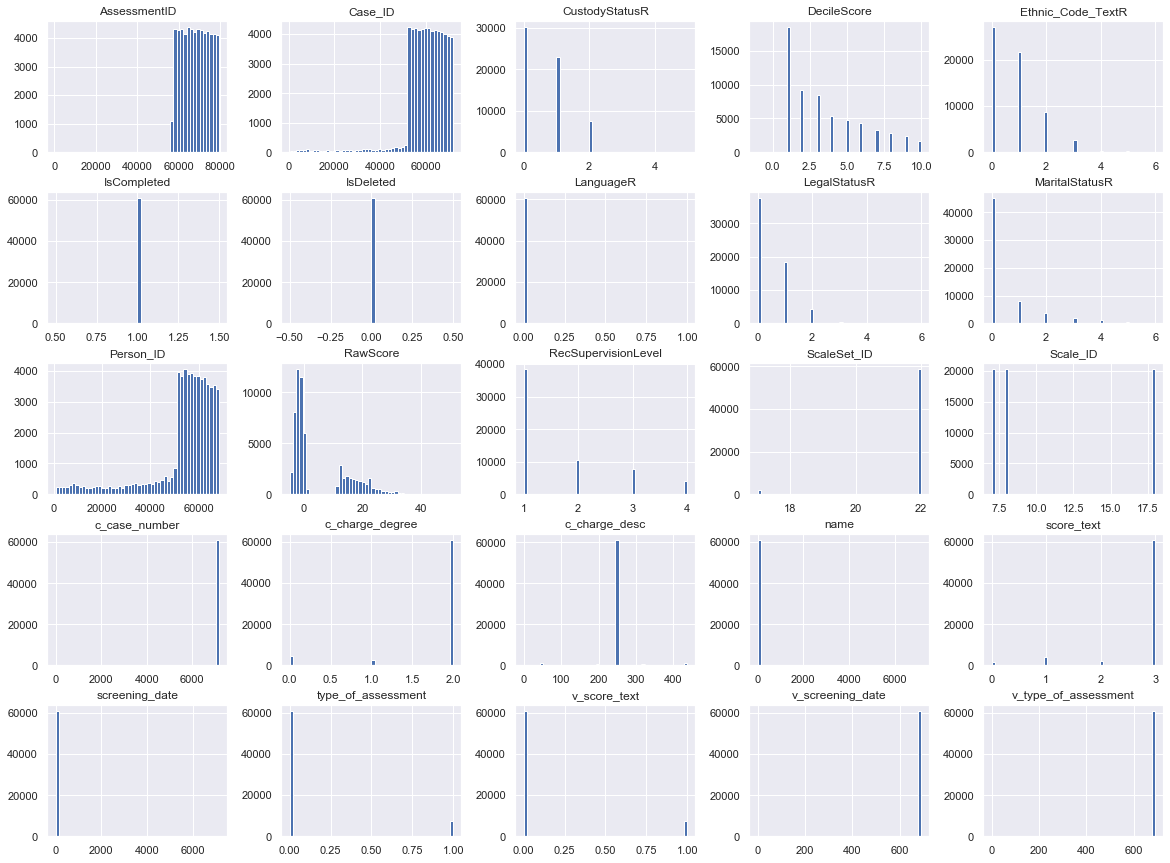

In [486]:
%matplotlib inline
# only in a Jupyter notebook
compas_concat.hist(bins=50, figsize=(20,15))
plt.show()

In [487]:
corr_matrix = compas_concat.corr()

In [488]:
corr_matrix["Ethnic_Code_TextR"].sort_values(ascending=False)

Ethnic_Code_TextR       1.000000
LegalStatusR            0.132454
MaritalStatusR          0.115191
LanguageR               0.081438
CustodyStatusR          0.069956
AssessmentID            0.031319
Case_ID                 0.021488
Person_ID               0.010264
RecSupervisionLevel     0.005421
DecileScore             0.003973
RawScore                0.001243
Scale_ID                0.000000
ScaleSet_ID            -0.005945
IsCompleted                  NaN
IsDeleted                    NaN
name                         NaN
c_case_number                NaN
c_charge_degree              NaN
c_charge_desc                NaN
type_of_assessment           NaN
score_text                   NaN
screening_date               NaN
v_type_of_assessment         NaN
v_score_text                 NaN
v_screening_date             NaN
Name: Ethnic_Code_TextR, dtype: float64

In [489]:
#It looks like "marital status" may a value worth looking at more closely 

In [490]:
def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))    
    test_set_size = int(len(data) * test_ratio)    
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [491]:
train_set, test_set = split_train_test(compas_concat, 0.2)

In [492]:
print(len(train_set), "train +", len(test_set), "test")

54446 train + 13611 test


In [493]:
from pandas.plotting import scatter_matrix

## Use bar charts instead

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028ED6459548>,
      dtype=object)

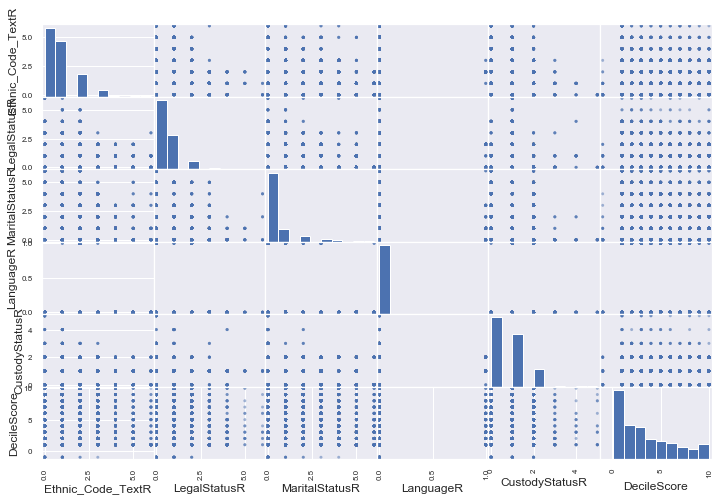

In [494]:
attributes = ["Ethnic_Code_TextR", "LegalStatusR", "MaritalStatusR", 
              "LanguageR", "CustodyStatusR", "DecileScore"]
scatter_matrix(compas_concat[attributes], figsize=(12,8))

In [495]:
corr_matrix["Ethnic_Code_TextR"].sort_values(ascending=False)

Ethnic_Code_TextR       1.000000
LegalStatusR            0.132454
MaritalStatusR          0.115191
LanguageR               0.081438
CustodyStatusR          0.069956
AssessmentID            0.031319
Case_ID                 0.021488
Person_ID               0.010264
RecSupervisionLevel     0.005421
DecileScore             0.003973
RawScore                0.001243
Scale_ID                0.000000
ScaleSet_ID            -0.005945
IsCompleted                  NaN
IsDeleted                    NaN
name                         NaN
c_case_number                NaN
c_charge_degree              NaN
c_charge_desc                NaN
type_of_assessment           NaN
score_text                   NaN
screening_date               NaN
v_type_of_assessment         NaN
v_score_text                 NaN
v_screening_date             NaN
Name: Ethnic_Code_TextR, dtype: float64

In [496]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

In [497]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [498]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [499]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(40834, 15) (40834,)
(27223, 15) (40834,)


In [500]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [501]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [502]:
import os

import shap
import gc

from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
warnings.simplefilter(action='ignore', category=FutureWarning)

In [503]:
## ----------Dataset for  LightGBM Model  -----------------------
train_data=lgb.Dataset(x_train,label=y_train)
valid_data=lgb.Dataset(x_test,label=y_test)

Verify dataset is what we should be using

In [504]:
print(compas_concat.dtypes)

Person_ID                      float64
AssessmentID                   float64
Case_ID                        float64
MiddleName                      object
DateOfBirth             datetime64[ns]
ScaleSet_ID                    float64
RecSupervisionLevel            float64
Scale_ID                       float64
RawScore                       float64
DecileScore                    float64
IsCompleted                    float64
IsDeleted                      float64
name                             int32
c_case_number                    int32
c_charge_degree                  int32
c_charge_desc                    int32
type_of_assessment               int32
score_text                       int32
screening_date                   int32
v_type_of_assessment             int32
v_score_text                     int32
v_screening_date                 int32
Ethnic_Code_TextR              float64
LanguageR                      float64
LegalStatusR                   float64
CustodyStatusR           

In [506]:
lgbm = lgb.train(params,
                 train_data,
#                  2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 15,
                 verbose_eval= 30
                 )

NameError: name 'params' is not defined

In [165]:
##this is telling me the accuracy of my training data

In [166]:
from sklearn.metrics import roc_auc_score
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]
    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]
    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
  return roc_auc_dict

########This is code to address a Multi_Class error I got in the following cell

In [154]:
y_pred = lgbm.predict(x_test)
score = roc_auc_score_multiclass(y_test, y_pred)
#print("Overall AUC on validation (not test!): {:.3f}" .format(score))
print(score)

{1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, -1: 0.5}


In [160]:
data = compas_concat.drop(['DecileScore', 'MiddleName'],axis=1)

In [161]:
import shap
lgbm.params['objective'] = 'binary' ## workaround
%time shap_values = shap.TreeExplainer(lgbm).shap_values(data)

Wall time: 7.13 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [162]:
lm = LinearRegression()

In [164]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)